# Sistem Rekomendasi Destinasi Wisata Berbasis Collaborative Filtering
<hr>


In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!rm -rf data

In [3]:
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56             91        342  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           6972        128  1.0              
muhammadroshaanriaz/e-commerce-trends-a-guide-to-leveraging-dataset  Exploring E-commerce Trends⭐️⭐️⭐️                 25KB  2024-06-12 18:07:11           1242         33  1.0              
rabieelkharoua/diabetes-health-dataset-analysis   

In [4]:
! kaggle datasets download -d aprabowo/indonesia-tourism-destination

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
indonesia-tourism-destination.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
import os

In [6]:
local_zip = 'indonesia-tourism-destination.zip'
target_extraction = '/content/data/'
file_check = "dataset"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)

except FileNotFoundError:
    print('Zip File Not Found!')

In [7]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [9]:
pip install --upgrade TENSORFLOW

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

## 1. Mengimpor Library Python yang Dibutuhkan

In [8]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

## 2. Menyiapkan Dataset yang digunakan

In [9]:
# Upload semua dataset yang dipakai
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 3. Data Understanding

### 3.1 Menyiapkan Data

In [10]:
# Menyimpan masing-masing dataset kedalam variabel

rating = pd.read_csv('data/tourism_rating.csv')
place = pd.read_csv('data/tourism_with_id.csv')
user = pd.read_csv('data/user.csv')

### 3.2 Eksplorasi Fitur-fitur pada Data

#### 3.2.1. Data place

In [11]:
# Melihat gambaran data place

place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [12]:
# Membuang kolom yang tidak dipakai

place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


In [13]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [14]:
# Membuang kolom yang tidak dipakai

place = place.drop('Time_Minutes', axis=1)

In [15]:
df = pd.DataFrame(place)
print("Data sebelum diurutkan:")
print(df)


Data sebelum diurutkan:
     Place_Id                                 Place_Name  \
0           1                           Monumen Nasional   
1           2                                   Kota Tua   
2           3                              Dunia Fantasi   
3           4          Taman Mini Indonesia Indah (TMII)   
4           5                   Atlantis Water Adventure   
..        ...                                        ...   
432       433                        Museum Mpu Tantular   
433       434                              Taman Bungkul   
434       435           Taman Air Mancur Menari Kenjeran   
435       436               Taman Flora Bratang Surabaya   
436       437  Gereja Perawan Maria Tak Berdosa Surabaya   

                                           Description       Category  \
0    Monumen Nasional atau yang populer disingkat d...         Budaya   
1    Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya   
2    Dunia Fantasi atau disebut juga

In [16]:
#Memfilter data berdasarkan rentang ID 1-20
filter1 = df[(df['Place_Id'] >= 1) & (df['Place_Id'] <= 20)]

#Memfilter data berdasarkan rentang ID 85-105
filter2 = df[(df['Place_Id'] >= 85) & (df['Place_Id'] <= 105)]

#Memfilter data berdasarkan rentang ID 211-231
filter3 = df[(df['Place_Id'] >= 211) & (df['Place_Id'] <= 231)]

#Memfilter data berdasarkan rentang ID 335-355
filter4 = df[(df['Place_Id'] >= 335) & (df['Place_Id'] <= 355)]

#Memfilter data berdasarkan rentang ID 392-412
filter5 = df[(df['Place_Id'] >= 392) & (df['Place_Id'] <= 412)]

#Menggabungkan hasil filter
filtered_df = pd.concat([filter1, filter2, filter3, filter4, filter5])

#Mengurutkan dataset yang sudah difilter berdasarkan kolom 'ID'
place = filtered_df.sort_values(by='Place_Id')

df_user = pd.DataFrame(user)

In [17]:
# Menampilkan data setelah diurutkan
print("\nData setelah diurutkan:")
print(place)


Data setelah diurutkan:
     Place_Id                         Place_Name  \
0           1                   Monumen Nasional   
1           2                           Kota Tua   
2           3                      Dunia Fantasi   
3           4  Taman Mini Indonesia Indah (TMII)   
4           5           Atlantis Water Adventure   
..        ...                                ...   
407       408            Kebun Binatang Surabaya   
408       409                        Rumah Batik   
409       410                  Ciputra Waterpark   
410       411          Masjid Muhammad Cheng Hoo   
411       412           Masjid Nasional Al-Akbar   

                                           Description       Category  \
0    Monumen Nasional atau yang populer disingkat d...         Budaya   
1    Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya   
2    Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan   
3    Taman Mini Indonesia Indah merupakan suatu kaw...  Ta

## Data Category

#### 3.2.2. Data rating

In [18]:
def create_variation(df_user, n):
    dfs = [df_user.copy() for _ in range(n)]
    for i, df_var in enumerate(dfs):
        df_var['User_Id'] += i * len(df_user)  # Mengubah User_Id
    return pd.concat(dfs, ignore_index=True)

# Menduplikasi dan membuat variasi pada data user
df_varied_user = create_variation(user, 3)  # 3 adalah jumlah variasi


In [19]:
# melihat gambaran data rating

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [20]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [21]:
# Merubah data rating agar hanya berisi rating pada tempat wisata
rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


In [22]:
rating.shape

(2368, 3)

#### 3.2.3. Data user

In [23]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [24]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').sort_values('User_Id')
user.head()

,User_Id,Location,Age
2192,1,"Semarang, Jawa Tengah",20
873,1,"Semarang, Jawa Tengah",20
1204,1,"Semarang, Jawa Tengah",20
299,1,"Semarang, Jawa Tengah",20
415,1,"Semarang, Jawa Tengah",20


In [25]:
# Melihat dataset user yang pernah memberi rating pada wisata

user.shape

(2368, 3)

## 4. Eksplorasi Data

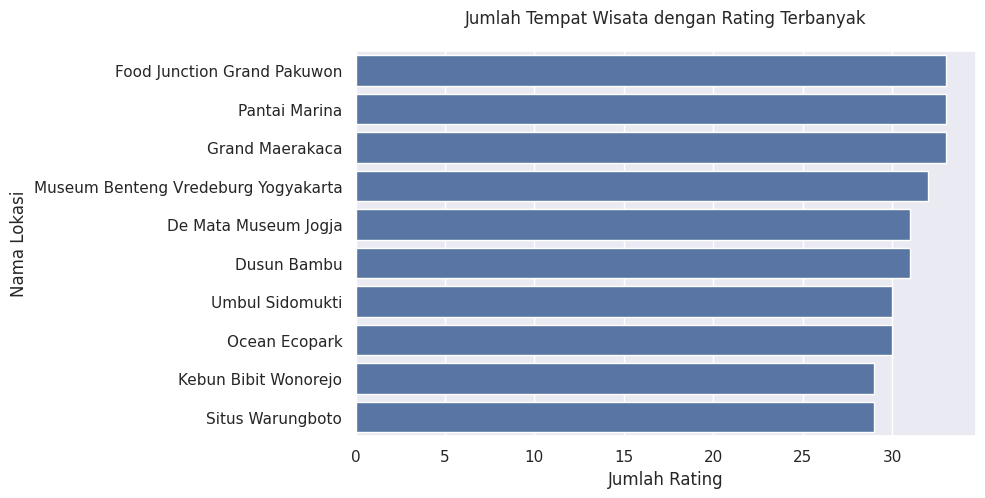

In [26]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10.columns = ['Place_Id', 'count']  # Rename columns for easier access
top_10 = pd.merge(top_10, place[['Place_Id', 'Place_Name']], how='left', on='Place_Id')


# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8, 5))
sns.barplot(x='count', y='Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Nama Lokasi')
plt.xlabel('Jumlah Rating')
plt.show()

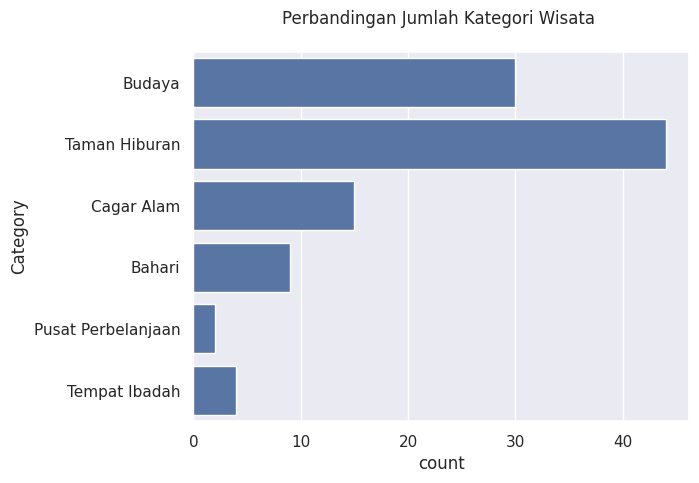

In [27]:
# Membuat visualisasi jumlah kategori wisata

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata ', pad=20)
plt.show()

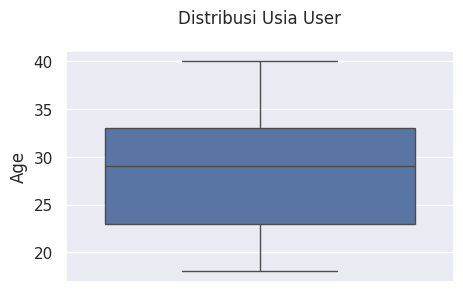

In [28]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

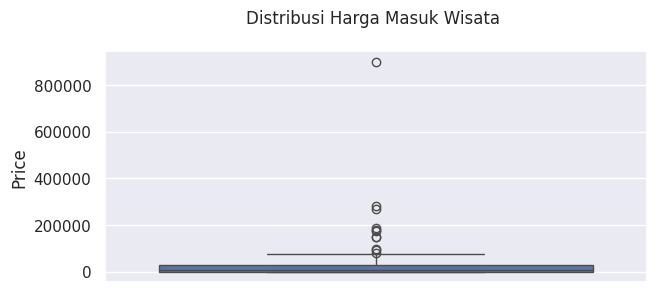

In [29]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata ', pad=20)
plt.show()

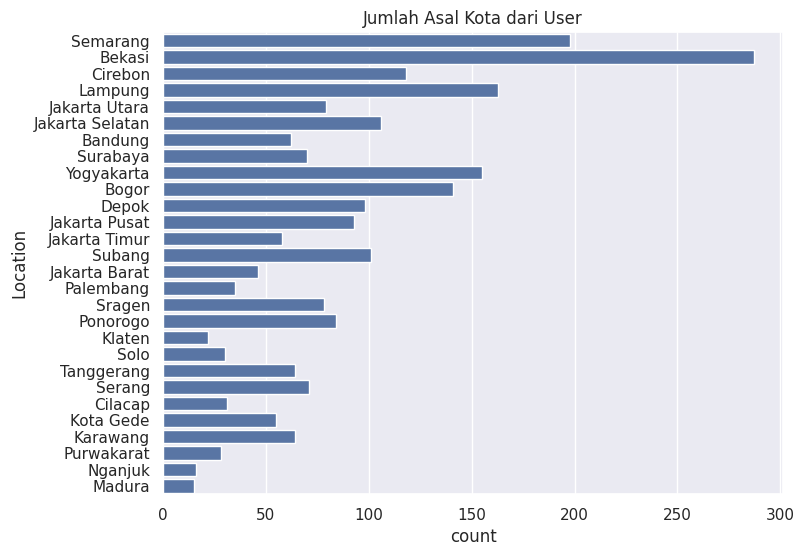

In [30]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

## 5. Persiapan Data untuk Pemodelan

### 5.1. Membuat Salinan Data rating

In [31]:
# Membaca dataset untuk dilakukan encoding

df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


### 5.2. Melakukan Encoding

#### 5.2.1. Membuat Fungsi untuk Melakukan Encoding

In [32]:
def dict_encoder(col, data):
    unique_val = data[col].unique().tolist()
    val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}
    val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
    return val_to_val_encoded, val_encoded_to_val

def encode_data(df):
    user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id', df)
    df['user'] = df['User_Id'].map(user_to_user_encoded)

    place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id', df)
    df['place'] = df['Place_Id'].map(place_to_place_encoded)

    return df, user_to_user_encoded, place_to_place_encoded

# Menyandikan data rating
rating_encoded, user_to_user_encoded, place_to_place_encoded = encode_data(rating)

# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
rating_encoded['Place_Ratings'] = rating_encoded['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(rating_encoded['Place_Ratings']), max(rating_encoded['Place_Ratings'])
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 104, Min Rating: 1.0, Max Rating: 5.0


#### 5.2.2. Encoding dan Mapping Kolom User

### 5.3. Melihat Gambaran Data untuk Pemodelan

In [33]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings
1094,289,217,2
188,61,9,3


## 6. Pemodelan Machine Learning

### 6.1. Membagi data train dan test

In [34]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = rating_encoded[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = rating_encoded['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * rating_encoded.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)


### 6.2. Menyiapkan Model

#### Deklarasi Fungsi

In [35]:
def dict_encoder(col, data):
    unique_val = data[col].unique().tolist()
    val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}
    val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
    return val_to_val_encoded, val_encoded_to_val


def encode_data(df):
    user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id', df)
    df['user'] = df['User_Id'].map(user_to_user_encoded)

    place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id', df)
    df['place'] = df['Place_Id'].map(place_to_place_encoded)

    return df, user_to_user_encoded, place_to_place_encoded


#### Membaca, Mengolah, dan Mempersiapkan Data:

In [36]:

# Membaca data dan melakukan encoding
df_encoded, user_to_user_encoded, place_to_place_encoded = encode_data(rating)

# Mendapatkan jumlah user dan place
num_users, num_places = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df_encoded['Place_Ratings'] = df_encoded['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df_encoded['Place_Ratings']), max(df_encoded['Place_Ratings'])

In [37]:
# Assuming `place` and `df` are your dataframes

# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id', place)

# Mapping Place_Id to dataframe df
df['place'] = df['Place_Id'].map(place_to_place_encoded)

# Print df to verify the encoding
print(df)


      User_Id  Place_Id  Place_Ratings  place
1094      289       217              2     47
188        61         9              3      8
1800      238       350              3     77
707       239        95              5     30
679       255        94              2     29
...       ...       ...            ...    ...
1638       10       344              3     71
1095      297       217              4     47
1130       69       219              2     49
1294       91       226              3     56
860       123       102              1     37

[2368 rows x 4 columns]


#### Pembagian Data dan Persiapan untuk Pelatihan:

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import GaussianNoise, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [39]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, GaussianNoise, Flatten, Concatenate, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.losses import MeanSquaredError

def create_ncf_model(num_users, num_places, embedding_size=50):
    user_input = Input(shape=(1,), name='user_input')
    place_input = Input(shape=(1,), name='place_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, name='user_embedding')(user_input)
    user_embedding = GaussianNoise(0.1)(user_embedding)

    place_embedding = Embedding(input_dim=num_places, output_dim=embedding_size, name='place_embedding')(place_input)
    place_embedding = GaussianNoise(0.1)(place_embedding)

    user_flatten = Flatten()(user_embedding)
    place_flatten = Flatten()(place_embedding)

    concat = Concatenate()([user_flatten, place_flatten])

    dense = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3))(concat)
    batch_norm = BatchNormalization()(dense)
    dropout = Dropout(0.4)(batch_norm)

    dense_2 = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3))(dropout)
    batch_norm_2 = BatchNormalization()(dense_2)
    dropout_2 = Dropout(0.4)(batch_norm_2)

    dense_3 = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3))(dropout_2)
    batch_norm_3 = BatchNormalization()(dense_3)
    dropout_3 = Dropout(0.4)(batch_norm_3)

    output = Dense(1, activation='sigmoid')(dropout_3)

    model = Model(inputs=[user_input, place_input], outputs=output)
    model.compile(loss='mse', optimizer=Adam(learning_rate=1e-3), metrics=['mse'])

    return model

# Anda asumsikan num_users dan num_places sudah didefinisikan
# model = create_ncf_model(num_users, num_places)
# model.summary()

# Implementasi K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
fold_no = 1
mse_scores = []

best_models = []

for fold_no, (train, test) in enumerate(kfold.split(x, y), 1):
    model = create_ncf_model(num_users, num_place, embedding_size=50)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    model_checkpoint = ModelCheckpoint(
        filepath=f'best_model_fold_{fold_no}.keras',  # Ubah ekstensi ke .h5
        monitor='val_loss',
        save_best_only=True
    )

    history = model.fit(
        [x[train, 0], x[train, 1]], y[train],
        batch_size=128,
        epochs=100,
        validation_data=([x[test, 0], x[test, 1]], y[test]),
        callbacks=[early_stopping, reduce_lr, model_checkpoint],
        verbose=1
    )

    # Muat model terbaik dari setiap fold
    best_model_fold = load_model(f'best_model_fold_{fold_no}.keras', custom_objects={'mse': 'mse'})  # Diperbaiki
    best_models.append(best_model_fold)

# Gabungkan semua model terbaik menjadi satu model
final_model = create_ncf_model(num_users, num_place, embedding_size=50)

# Set atribut trainable ke False untuk semua layer agar dibekukan
for layer in final_model.layers:
    layer.trainable = False

# Transfer bobot dari model-model terbaik
for fold_model in best_models:
    final_model.set_weights(fold_model.get_weights())

# Simpan model final dalam format Keras asli
final_model.save('best_model.keras')

# Muat kembali model, spesifikasikan 'mse' di custom_objects
final_model = load_model('best_model.keras', custom_objects={'mse': 'mse'})


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 900ms/step - loss: 0.6444 - mse: 0.2057 - val_loss: 0.5521 - val_mse: 0.1200 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.6425 - mse: 0.2125 - val_loss: 0.5445 - val_mse: 0.1209 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6098 - mse: 0.1884 - val_loss: 0.5364 - val_mse: 0.1213 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6032 - mse: 0.1901 - val_loss: 0.5274 - val_mse: 0.1206 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5807 - mse: 0.1759 - val_loss: 0.5188 - val_mse: 0.1202 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5708 - mse: 0.1742 - val_loss: 0.5105 - val_mse: 0.1200 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5554 - mse: 0.1668 - val_loss: 0.5025 - val_mse: 0.1200 - learning_rate: 0.0010
Epoch 8/1

In [40]:
final_model.compile(loss='mse', optimizer=Adam(learning_rate=1e-3), metrics=['MeanSquaredError'])

In [41]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import load_model

# Load the model, specifying the custom loss function
final_model = load_model('best_model.keras', custom_objects={'MeanSquaredError': MeanSquaredError})


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import os


# Memuat model dengan eksplisit menyertakan MeanSquaredError sebagai custom object
final_model = load_model('best_model.keras', custom_objects={'mse': MeanSquaredError()})

#### Inisialisasi dan Pelatihan Model:

#### Visualisasi Hasil Pelatihan

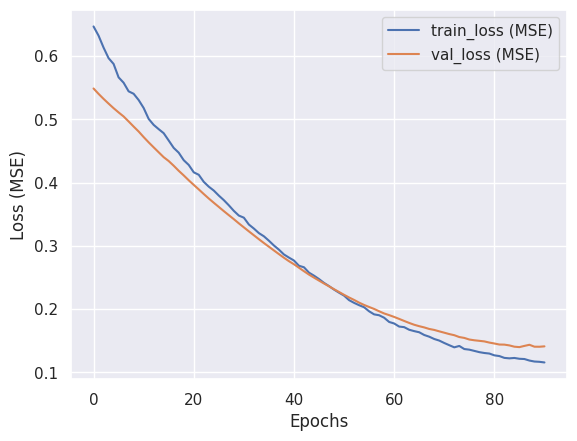

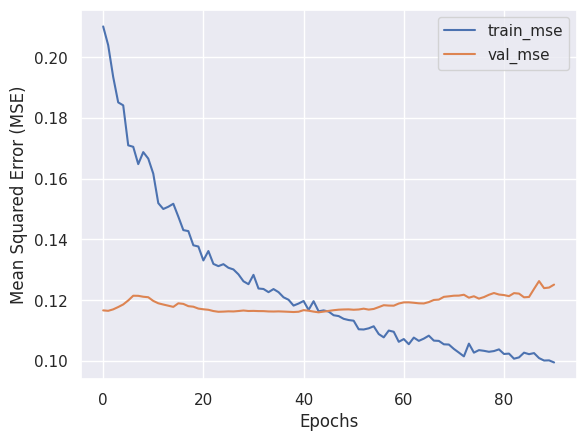

In [42]:
# Visualisasi hasil training dan validasi
plt.plot(history.history['loss'], label='train_loss (MSE)')
plt.plot(history.history['val_loss'], label='val_loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='train_mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

## hasil rekomendasi untuk user

In [43]:
# Buat DataFrame baru yang berisi semua pasangan pengguna-tempat yang mungkin
all_users = np.array(list(user_to_user_encoded.values()))
all_places = np.array(list(place_to_place_encoded.values()))
all_user_place = np.array(np.meshgrid(all_users, all_places)).T.reshape(-1, 2)
df_all_user_place = pd.DataFrame(all_user_place, columns=['user', 'place'])

# Gunakan model yang sudah dilatih untuk membuat prediksi rating
predictions = model.predict([df_all_user_place['user'], df_all_user_place['place']])

# Tambahkan prediksi rating ke DataFrame
df_all_user_place['predicted_rating'] = predictions.flatten()

# Urutkan hasil prediksi berdasarkan rating tertinggi
df_recommendations = df_all_user_place.sort_values(by='predicted_rating', ascending=False)

# Tampilkan hasil rekomendasi dalam bentuk DataFrame
print(df_recommendations.head(10))


975/975 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
       user  place  predicted_rating
21204   203     92          0.723001
21125   203     13          0.720380
21166   203     54          0.718988
31188   299     92          0.718402
31109   299     13          0.715662
21144   203     32          0.715556
31150   299     54          0.713998
21192   203     80          0.713338
21215   203    103          0.711754
21112   203      0          0.711390


In [44]:
# Group the recommendations by place and sort them by predicted rating in descending order
grouped_recommendations = df_recommendations.groupby('place').apply(lambda x: x.sort_values(by='predicted_rating', ascending=False))

# Print the top 10 recommendations with the highest rating, considering only one recommendation per place
print("Top 10 Cultural Recommendations:")
seen_places = set()
recommendations_count = 0
for index, row in grouped_recommendations.iterrows():
    place_id = place_encoded_to_place[row['place']]
    if place_id not in seen_places:
        place_details = place[place['Place_Id'] == place_id]
        category = place_details['Category'].iloc[0]

        # Check if the place belongs to the 'Culture' category
        if category == 'Taman Hiburan':
            place_name = place_details['Place_Name'].iloc[0]
            price = place_details['Price'].iloc[0]
            rating = place_details['Rating'].iloc[0]

            print(f"Place ID: {place_id}")
            print(f"Place Name: {place_name}")
            print(f"Category: {category}")
            print(f"Price: {price}")
            print(f"Rating: {rating}")
            print("\n")

            seen_places.add(place_id)
            recommendations_count += 1

            if recommendations_count >= 10:
                break


Top 10 Cultural Recommendations:
Place ID: 3
Place Name: Dunia Fantasi
Category: Taman Hiburan
Price: 270000
Rating: 4.6


Place ID: 4
Place Name: Taman Mini Indonesia Indah (TMII)
Category: Taman Hiburan
Price: 10000
Rating: 4.5


Place ID: 5
Place Name: Atlantis Water Adventure
Category: Taman Hiburan
Price: 94000
Rating: 4.5


Place ID: 6
Place Name: Taman Impian Jaya Ancol
Category: Taman Hiburan
Price: 25000
Rating: 4.5


Place ID: 8
Place Name: Ocean Ecopark
Category: Taman Hiburan
Price: 180000
Rating: 4.0


Place ID: 19
Place Name: Kidzania
Category: Taman Hiburan
Price: 185000
Rating: 4.6


Place ID: 85
Place Name: Taman Pintar Yogyakarta
Category: Taman Hiburan
Price: 6000
Rating: 4.5


Place ID: 87
Place Name: Sindu Kusuma Edupark (SKE)
Category: Taman Hiburan
Price: 20000
Rating: 4.2


Place ID: 90
Place Name: Kampung Wisata Taman Sari
Category: Taman Hiburan
Price: 5000
Rating: 4.6


Place ID: 91
Place Name: Situs Warungboto
Category: Taman Hiburan
Price: 0
Rating: 4.4




In [45]:
import pandas as pd
import numpy as np

# Membaca data baru
new_user = pd.read_csv('new_user_data.csv')
new_rating = pd.read_csv('sample_ratings.csv')

# Menampilkan beberapa baris pertama dari data baru untuk memastikan terbaca dengan benar
print(new_user.head())
print(new_rating.head())

# Menamakan ulang kolom untuk konsistensi jika diperlukan
new_rating.rename(columns={'place_id': 'Place_Id', 'user_id': 'User_Id', 'rating': 'Place_Ratings'}, inplace=True)

# Menggabungkan data rating baru dengan data tempat untuk mendapatkan informasi lengkap tempat
new_rating_merged = pd.merge(new_rating, place, on='Place_Id', how='left')

# Menampilkan beberapa baris pertama dari data yang digabungkan untuk memastikan penggabungan benar
print(new_rating_merged.head())

# Menggabungkan data baru dengan user data sebelumnya
new_user_encoded = new_user.copy()
new_user_encoded['user'] = new_user_encoded['User_Id'].map(user_to_user_encoded)

# Lakukan encoding pada User_Id dan Place_Id untuk data rating baru
new_rating_merged['user'] = new_rating_merged['User_Id'].map(user_to_user_encoded)
new_rating_merged['place'] = new_rating_merged['Place_Id'].map(place_to_place_encoded)

# Menghapus baris dengan nilai NaN akibat Place_Id atau User_Id yang tidak ada dalam dictionary
new_rating_merged = new_rating_merged.dropna(subset=['user', 'place'])

# Melakukan prediksi dengan model
predictions = model.predict([new_rating_merged['user'], new_rating_merged['place']])

# Menambahkan hasil prediksi ke DataFrame
new_rating_merged['predicted_rating'] = predictions.flatten()

# Menampilkan hasil prediksi
print(new_rating_merged[['User_Id', 'Place_Id', 'Place_Name', 'Category', 'predicted_rating']])


   User_Id                     Location  Age
0        1  Yogyakarta, D.I. Yogyakarta   54
1        2           Malang, Jawa Timur   42
2        3              Cilegon, Banten   29
3        4           Bekasi, Jawa Barat   15
4        5           Bekasi, Jawa Barat   44
   place_id  user_id  rating
0         1      101     4.5
1         2      102     3.8
2         3      103     4.2
3         4      104     5.0
4         5      105     4.7
   Place_Id  User_Id  Place_Ratings                         Place_Name  \
0         1      101            4.5                   Monumen Nasional   
1         2      102            3.8                           Kota Tua   
2         3      103            4.2                      Dunia Fantasi   
3         4      104            5.0  Taman Mini Indonesia Indah (TMII)   
4         5      105            4.7           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang p

In [46]:
# Print the top 10 recommendations with the highest rating, considering only one recommendation per place
print("Top 10 Cultural Recommendations:")
seen_places = set()
recommendations_count = 0
for index, row in grouped_recommendations.iterrows():
    place_id = place_encoded_to_place[row['place']]
    if place_id not in seen_places:
        place_details = place[place['Place_Id'] == place_id]
        category = place_details['Category'].iloc[0]

        # Check if the place belongs to the 'Culture' category
        if category == 'Cagar Alam':
            place_name = place_details['Place_Name'].iloc[0]
            price = place_details['Price'].iloc[0]
            rating = place_details['Rating'].iloc[0]

            print(f"Place ID: {place_id}")
            print(f"Place Name: {place_name}")
            print(f"Category: {category}")
            print(f"Price: {price}")
            print(f"Rating: {rating}")
            print("\n")

            seen_places.add(place_id)
            recommendations_count += 1

            if recommendations_count >= 10:
                break

Top 10 Cultural Recommendations:
Place ID: 7
Place Name: Kebun Binatang Ragunan
Category: Cagar Alam
Price: 4000
Rating: 4.5


Place ID: 93
Place Name: Gembira Loka Zoo
Category: Cagar Alam
Price: 60000
Rating: 4.5


Place ID: 211
Place Name: GunungTangkuban perahu
Category: Cagar Alam
Price: 30000
Rating: 4.5


Place ID: 215
Place Name: Taman Hutan Raya Ir. H. Djuanda
Category: Cagar Alam
Price: 15000
Rating: 4.5


Place ID: 217
Place Name: Kebun Binatang Bandung
Category: Cagar Alam
Price: 20000
Rating: 4.0


Place ID: 218
Place Name: Kawah Putih
Category: Cagar Alam
Price: 81000
Rating: 4.5


Place ID: 219
Place Name: Tebing Karaton
Category: Cagar Alam
Price: 15000
Rating: 4.5


Place ID: 341
Place Name: Hutan Wisata Tinjomoyo Semarang
Category: Cagar Alam
Price: 3000
Rating: 4.3


Place ID: 349
Place Name: Wisata Mangrove Tapak
Category: Cagar Alam
Price: 5000
Rating: 4.3


Place ID: 355
Place Name: Umbul Sidomukti
Category: Cagar Alam
Price: 75000
Rating: 4.6






# save model





In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import os


# Memuat model dengan eksplisit menyertakan MeanSquaredError sebagai custom object
final_model = load_model('best_model.keras', custom_objects={'MeanSquaredError': MeanSquaredError()})

In [49]:
import joblib

joblib.dump(final_model, 'model.pkl')

['model.pkl']

In [50]:
place.to_csv('data/place_data.csv', index=False)

# API untuk Prediksi

In [51]:
import joblib

joblib.dump(user_to_user_encoded, 'user_to_user_encoded.pkl')
joblib.dump(place_to_place_encoded, 'place_to_place_encoded.pkl')

['place_to_place_encoded.pkl']

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd


app = Flask(__name__)

# Muat model terlatih
final_model = tf.keras.models.load_model('best_model.keras')

# Muat dictionary encoding
user_to_user_encoded = joblib.load('user_to_user_encoded.pkl')
place_to_place_encoded = joblib.load('place_to_place_encoded.pkl')
place_to_index = {v: k for k, v in place_to_place_encoded.items()}  # Kebalikan dari place_to_place_encoded

@app.route('/recommend', methods=['GET'])
def recommend():
    user_id = int(request.args.get('user_id'))

    if user_id not in user_to_user_encoded:
        return jsonify({'error': 'User ID tidak ditemukan'}), 404

    user_encoded = user_to_user_encoded[user_id]
    all_places = np.array(list(place_to_place_encoded.values()))

    user_place_array = np.array([[user_encoded, place] for place in all_places])
    df_user_place = pd.DataFrame(user_place_array, columns=['user', 'place'])

    predictions = model.predict([df_user_place['user'], df_user_place['place']])
    df_user_place['predicted_rating'] = predictions.flatten()

    df_recommendations = df_user_place.sort_values(by='predicted_rating', ascending=False)
    top_recommendations = df_recommendations.head(10)

    recommended_places = [place_to_index[place] for place in top_recommendations['place'].values]

    return jsonify({'user_id': user_id, 'recommended_places': recommended_places})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
